# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [2]:
df=pd.read_excel('GermanCredit.xlsx')

In [3]:
df.shape

(1000, 3)

In [15]:
df.Creditability.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

# 2. Check how many records do we have


In [3]:
df.shape

(1000, 3)

# 3. Plot Histogram for column 'CreditAmount'

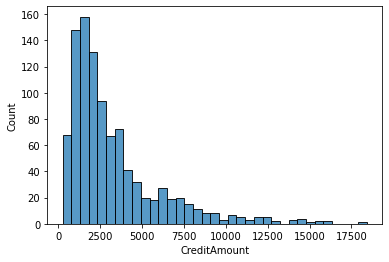

In [4]:
sns.histplot(df['CreditAmount'])
plt.show()

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


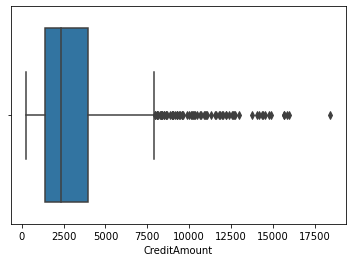

In [20]:
sns.boxplot(df['CreditAmount'])
plt.show()

# 3b. Create creditability dataframe

In [5]:
df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


In [7]:
df['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


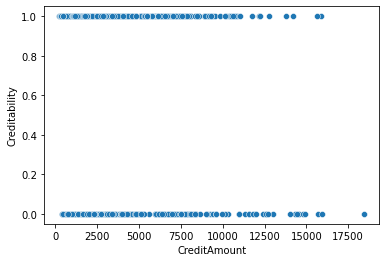

In [27]:
#plt.scatter(df['CreditAmount'],df['Creditability'])
sns.scatterplot(df['CreditAmount'],df['Creditability'])
plt.show()

# 6. Prepare input data for the model

In [37]:
df.isnull().sum()

Creditability               0
CreditAmount                0
DurationOfCreditInMonths    0
dtype: int64

# 7. Fit logistic regression model

In [75]:
y=df.iloc[:,0]

In [76]:
x=df.iloc[:,[1,2]]

In [77]:
X=sm.add_constant(x)

In [83]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)

In [84]:
logClassify=LogisticRegression()

In [85]:
logClassify.fit(X_train,Y_train)

LogisticRegression()

In [86]:
y_pred=logClassify.predict(X_test)

# 8. Test accuracy calculation

In [91]:
print('Accuracy',accuracy_score(y_pred,Y_test)) #0.725
print("F1 score:",f1_score(y_pred, Y_test)) #0.832

Accuracy 0.725
F1 score: 0.8328267477203647


# 9. Build a confusion matrix

In [93]:
cm=confusion_matrix(y_pred, Y_test)
cm

array([[  8,   9],
       [ 46, 137]], dtype=int64)

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

In [ ]:
#Removing Outliers

In [94]:
Q1 = df.quantile(0.25)

#calculate the third quartile
Q3 = df.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# remove the outliers from the dataframe
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the row index
df = df.reset_index(drop=True)

# check the shape of the data
df.shape

(884, 3)

In [97]:
y=df.iloc[:,0]
x=df.iloc[:,[1,2]]
X=sm.add_constant(x)
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)
logClassify=LogisticRegression()
logClassify.fit(X_train,Y_train)
y_pred=logClassify.predict(X_test)
print('Accuracy',accuracy_score(y_pred,Y_test)) #0.725
print("F1 score:",f1_score(y_pred, Y_test)) #0.832
cm=confusion_matrix(y_pred, Y_test)
print("Confusion Matrix",cm)

Accuracy 0.7401129943502824
F1 score: 0.8506493506493508
Confusion Matrix [[  0   3]
 [ 43 131]]


In [5]:
df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12
